<a href="https://colab.research.google.com/github/andrenp2/FinancialStudyPython/blob/master/Invest06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05 - Simulando Carteiras Aleatorias De Acoes 


*** 5.1 - Importando Bibliotecas ***

In [2]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf


import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
import seaborn as sns

import random

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


*** 5.2 - Obtendo e Tratando Dados ***

In [11]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]




[*********************100%***********************]  73 of 73 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:

# temos 246 dias de pregao 

# vamos fazer alguns ajustes para dados faltantes, dropna tira os NaN
# retirar os ativos com dados faltantes.


dados_yahoo.dropna(how='all', inplace=True)             
dados_yahoo.dropna(axis=1, inplace=True, thresh=246) 


dados_yahoo


In [14]:
retorno = dados_yahoo.pct_change() #variacao percentual de cada ativo
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,0.017967,0.007603,-0.015728,-0.012806,-0.001025,0.003117,-0.006098,0.000799,-0.039833,-0.036735,0.034913,0.001713,-0.004249,-0.005310,0.013971,-0.019461,-0.017380,0.023041,-0.007900,-0.013208,-0.032961,-0.004479,0.008122,-0.009452,0.004828,-0.025097,-0.023416,-0.002564,0.010182,-0.001772,0.007442,-0.025948,0.000000,-0.027972,0.013475,-0.034510,-0.007524,0.006181,0.002203,-0.041976,-0.010836,-0.003603,0.031711,-0.003058,-0.006253,0.006246,0.010752,-0.004630,0.014644,0.006275,-0.015040,-0.016141,0.027915,-0.013083,0.000000,0.007108,0.005249,-0.010183,-0.015271,0.042321,-0.018055,-0.001747,0.034325,-0.015190,-0.011261,-0.042125,0.022286,0.064453,-0.000927
2019-07-03,0.039162,0.038906,0.022637,0.020869,0.018834,0.017758,0.005215,0.018167,0.007740,0.016949,0.024096,0.005700,0.013513,0.014760,0.002901,0.048855,0.009524,0.012613,0.027635,0.012747,0.027389,-0.003272,0.042654,-0.008588,0.008007,0.012437,0.015515,-0.005656,0.023873,0.031732,-0.000923,0.017076,-0.001739,0.014389,0.095856,-0.001475,0.015851,0.003292,0.011868,-0.007834,0.014867,0.017246,0.000000,0.012883,0.000000,0.008348,0.039492,0.006202,-0.015464,0.021277,0.010180,0.013423,-0.006570,0.010631,0.026150,0.017522,0.011749,0.011337,0.014257,0.003575,0.006452,0.029746,0.012168,0.002571,0.027335,-0.001946,0.012600,0.099083,0.006494
2019-07-04,0.008493,0.061053,0.034896,0.016206,0.022300,0.017448,0.009765,0.034510,-0.003687,0.021250,0.006765,0.035704,0.016842,0.060973,0.009400,0.018923,0.010108,0.029359,0.044667,0.016782,0.002370,-0.011079,0.022727,0.049086,0.006355,0.034570,0.039444,0.000000,0.016580,0.011829,0.016636,0.027535,-0.006471,0.024113,0.073081,0.037567,0.003731,0.013384,0.013466,-0.002079,0.013878,0.011485,0.016450,0.003634,0.030191,0.012524,0.001130,0.024653,0.003665,0.006466,0.013100,0.007726,0.026455,0.046753,0.010854,0.020091,0.025376,0.025327,0.014797,0.039949,0.017628,0.034834,0.020765,0.007692,0.048989,0.007409,0.010666,0.041736,0.023041
2019-07-05,0.000000,0.036364,0.019255,-0.003262,0.007749,0.008702,0.022968,0.063495,-0.027444,0.009792,-0.000876,0.020794,0.021394,0.043757,0.013610,-0.018572,0.003336,0.011236,-0.012216,0.006602,-0.013002,0.009751,0.016000,0.018349,0.004736,-0.001655,-0.002672,0.007239,-0.007136,0.002232,0.032727,0.004575,0.014780,0.001385,0.062319,0.029956,0.006083,-0.001016,0.018431,0.007184,0.009126,0.011084,0.034498,0.014484,0.014653,0.016771,0.022524,0.007519,0.009390,0.006424,-0.004310,0.000365,-0.000859,0.008933,0.007937,0.005394,-0.005663,-0.008504,0.012151,0.002447,0.029921,-0.002463,0.050107,-0.002036,0.024339,-0.025353,-0.009185,0.017628,0.009009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,-0.012757,0.090645,0.038744,0.008724,0.000509,-0.001390,-0.002775,0.032504,0.020793,-0.008720,0.007724,0.002819,-0.011321,

In [19]:
retorno_acumulado = (1 + retorno).cumprod()  # retorno desde o primeiro dia. 
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-07-02,1.017967,1.007603,0.984272,0.987194,0.998975,1.003117,0.993902,1.000799,0.960167,0.963265,1.034913,1.001713,0.995751,0.994690,1.013971,0.980539,0.982620,1.023041,0.992100,0.986792,0.967039,0.995521,1.008122,0.990548,1.004828,0.974903,0.976584,0.997436,1.010182,0.998228,1.007442,0.974052,1.000000,0.972028,1.013475,0.965490,0.992476,1.006181,1.002203,0.958024,0.989164,0.996397,1.031711,0.996942,0.993747,1.006246,1.010752,0.995370,1.014644,1.006275,0.984960,0.983859,1.027915,0.986917,1.000000,1.007108,1.005249,0.989817,0.984729,1.042321,0.981945,0.998253,1.034325,0.984810,0.988739,0.957875,1.022286,1.064453,0.999073
2019-07-03,1.057833,1.046804,1.006553,1.007795,1.017790,1.020930,0.999085,1.018981,0.967598,0.979592,1.059850,1.007422,1.009207,1.009371,1.016912,1.028443,0.991979,1.035945,1.019517,0.999371,0.993526,0.992264,1.051123,0.982042,1.012874,0.987028,0.991736,0.991795,1.034298,1.029904,1.006512,0.990685,0.998261,0.986014,1.110624,0.964067,1.008208,1.009494,1.014097,0.950519,1.003870,1.013581,1.031711,1.009786,0.993747,1.014646,1.050668,1.001543,0.998954,1.027685,0.994987,0.997065,1.021162,0.997409,1.026150,1.024755,1.017060,1.001039,0.998769,1.046047,0.988280,1.027948,1.046911,0.987342,1.015766,0.956011,1.035167,1.169922,1.005561
2019-07-04,1.066816,1.110715,1.041678,1.024128,1.040487,1.038743,1.008841,1.054146,0.964031,1.000408,1.067020,1.043391,1.026204,1.070915,1.026471,1.047904,1.002005,1.066359,1.065056,1.016143,0.995880,0.981270,1.075012,1.030246,1.019310,1.021150,1.030854,0.991795,1.051447,1.042087,1.023256,1.017964,0.991801,1.009790,1.191789,1.000284,1.011970,1.023005,1.027753,0.948542,1.017802,1.025221,1.048682,1.013456,1.023750,1.027353,1.051856,1.026235,1.002615,1.034330,1.008021,1.004769,1.048177,1.044041,1.037288,1.045343,1.042870,1.026392,1.013547,1.087836,1.005702,1.063756,1.068650,0.994937,1.065527,0.963094,1.046207,1.218750,1.028730
2019-07-05,1.066816,1.151105,1.061735,1.020787,1.048550,1.047783,1.032012,1.121079,0.937574,1.010204,1.066085,1.065087,1.048159,1.117775,1.040441,1.028443,1.005348,1.078341,1.052045,1.022851,0.982931,0.990839,1.092212,1.049149,1.024138,1.019460,1.028099,0.998974,1.043944,1.044412,1.056744,1.022621,1.006460,1.011189,1.266061,1.030248,1.018126,1.021965,1.046696,0.955357,1.027090,1.036585,1.084859,1.028134,1.038751,1.044583,1.075547,1.033951,1.012029,1.040975,1.003676,1.005136,1.047276,1.053368,1.045521,1.050982,1.036964,1.017664,1.025862,1.090498,1.035794,1.061135,1.122197,0.992911,1.091460,0.938677,1.036598,1.240234,1.037998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

*** 6.3 - Resultados ***

In [23]:
carteira = random.choices(dados_yahoo.columns, k = 5)
carteira = 1000 * retorno_acumulado.loc[:,carteira]
carteira["Saldo"] = carteira.sum(axis=1)
carteira["Retorno"] = carteira["Saldo"].pct_change()
carteira

,CIEL3.SA,BRML3.SA,ITSA4.SA,CMIG4.SA,BBDC3.SA,Saldo,Retorno
Date,,,,,,,
2019-07-01,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2019-07-02,980.538985,995.750710,989.164052,982.620318,998.975228,4947.049294,-0.010590
2019-07-03,1028.443188,1009.206783,1003.869987,991.978653,1017.790030,5051.288641,0.021071
2019-07-04,1047.904347,1026.203942,1017.801831,1002.005320,1040.487173,5134.402613,0.016454
2019-07-05,1028.443188,1048.158665,1027.089831,1005.347629,1048.550420,5157.589734,0.004516
...,...,...,...,...,...,...,...
2020-06-23,816.239022,784.130714,819.924778,777.601794,616.170670,3814.066979,-0.011637
2020-06-24,710.430219,773.655731,796.288780,753.045970,602.687027,3636.107727,-0.046659
2020-06-25,736.126644,763.180676,811.774402,763.277547,615.543510,3689.902779,0.014795


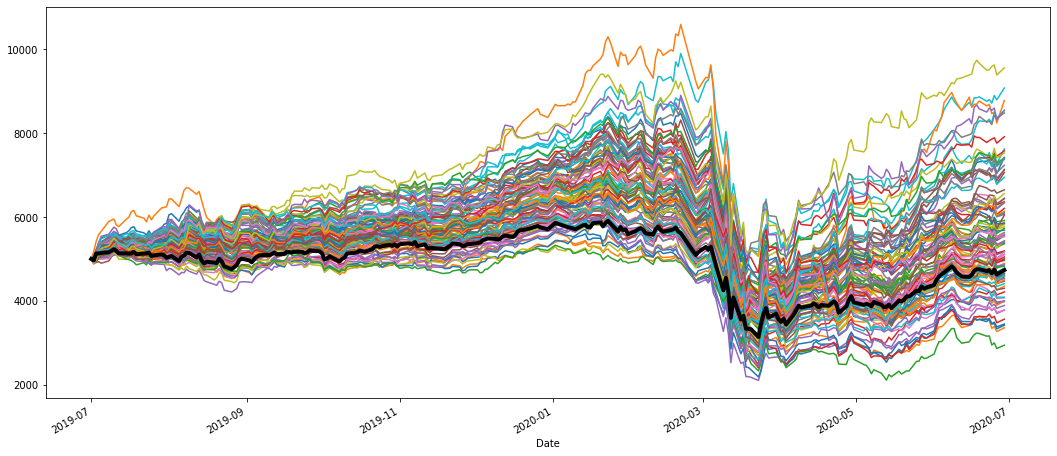

In [28]:
for i in range (100):
  carteira = random.choices(dados_yahoo.columns, k = 5)
  carteira = 1000 * retorno_acumulado.loc[:,carteira]
  carteira["Saldo"] = carteira.sum(axis=1)
  carteira["Saldo"].plot(figsize=(18,8))

(ibov*5000).plot(linewidth=4,color='black')